In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dabl

In [67]:
data = pd.read_csv('Mall_Customers.csv')

In [68]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [70]:
data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [71]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [72]:
data.shape

(200, 5)

In [73]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
data.tail()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [75]:
data.sample(5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
7,8,Female,23,18,94
44,45,Female,49,39,28
137,138,Male,32,73,73
9,10,Female,30,19,72
56,57,Female,51,44,50


Target looks like regression


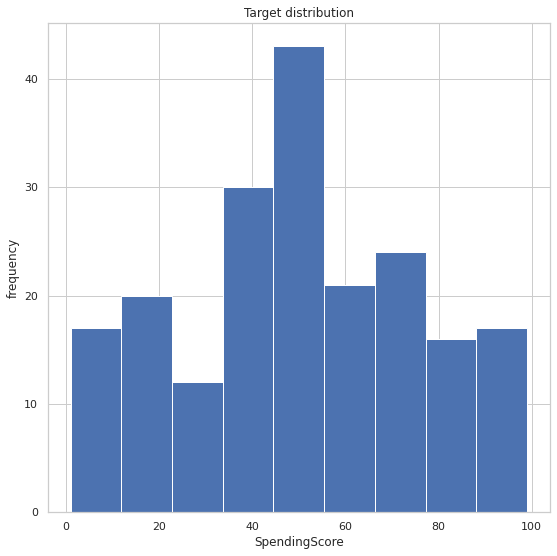

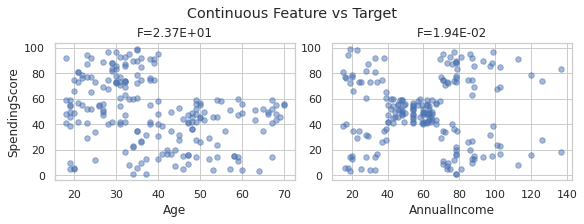

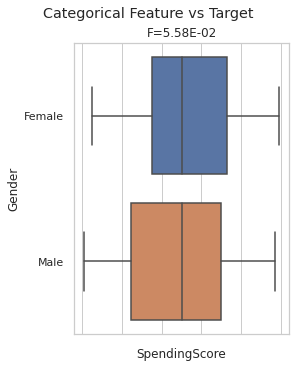

In [77]:
dabl.plot(data, target_col = 'SpendingScore')

Target looks like regression


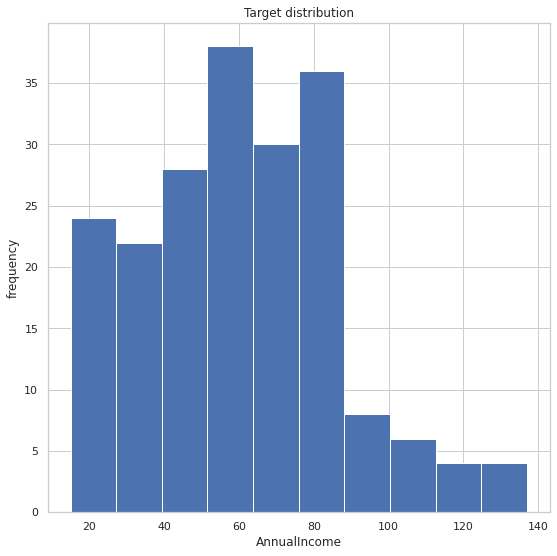

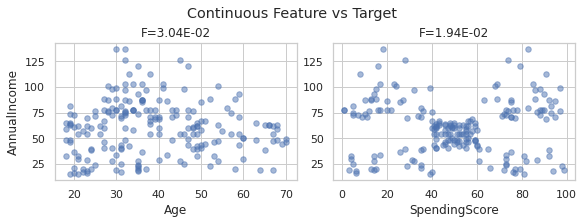

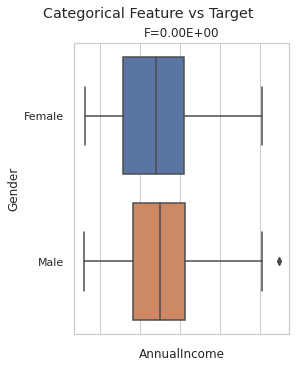

In [78]:
dabl.plot(data, target_col = 'AnnualIncome')

In [79]:
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [80]:
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [81]:
data.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

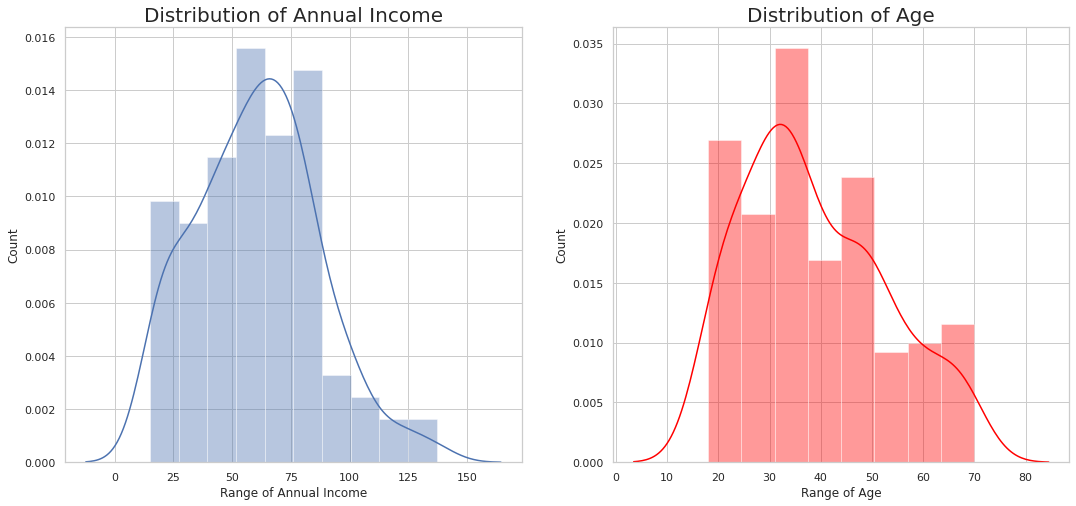

In [83]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['AnnualIncome'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

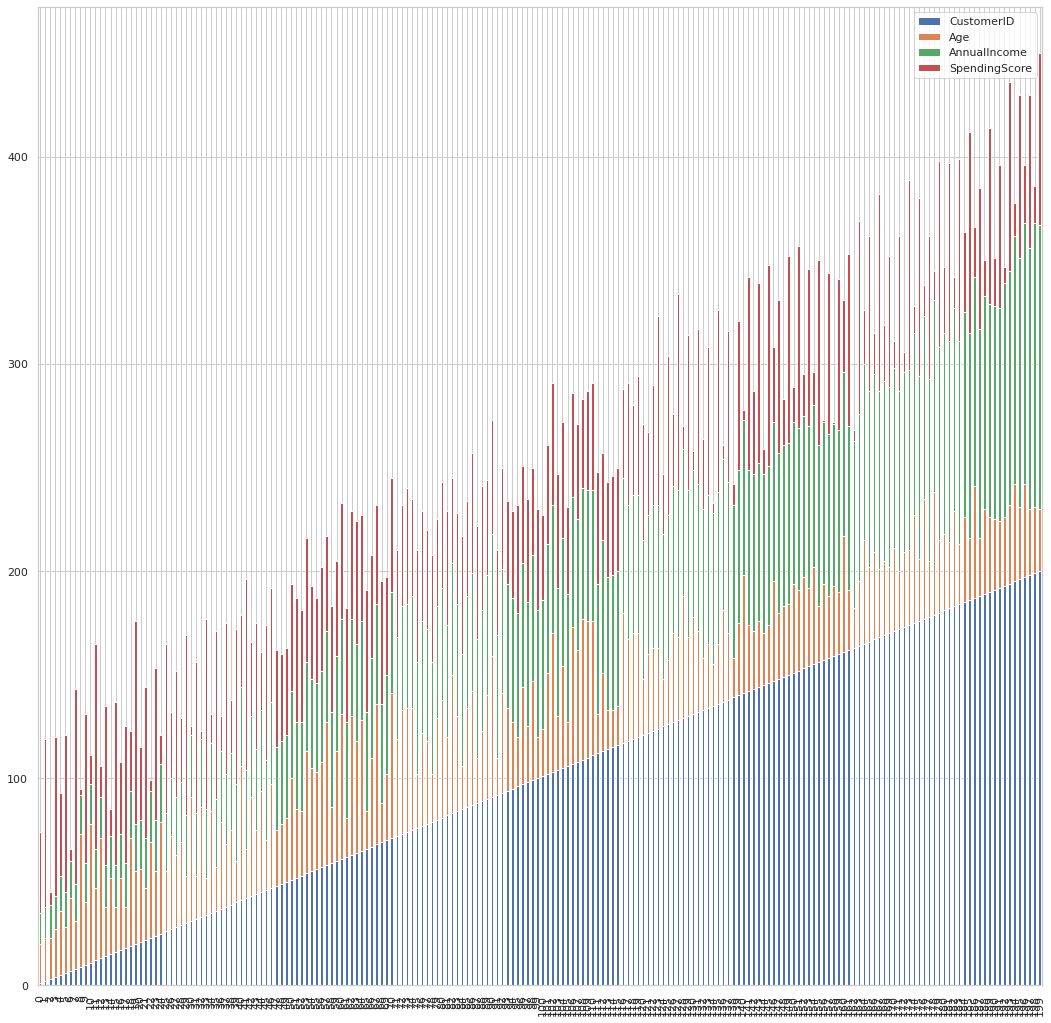

In [84]:
plt.rcParams['figure.figsize'] = (18, 18)

data.plot.bar(stacked=True)

In [85]:
male = data[data['Gender'] == 'Male']
female = data[data['Gender'] == 'Female']

male

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


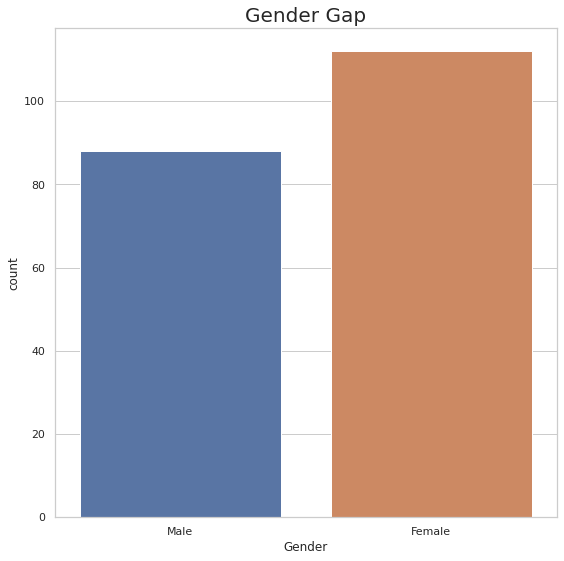

In [87]:
plt.rcParams['figure.figsize'] = (9, 9)

sns.countplot(x = data['Gender'], data = data['Gender'])
plt.title('Gender Gap', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

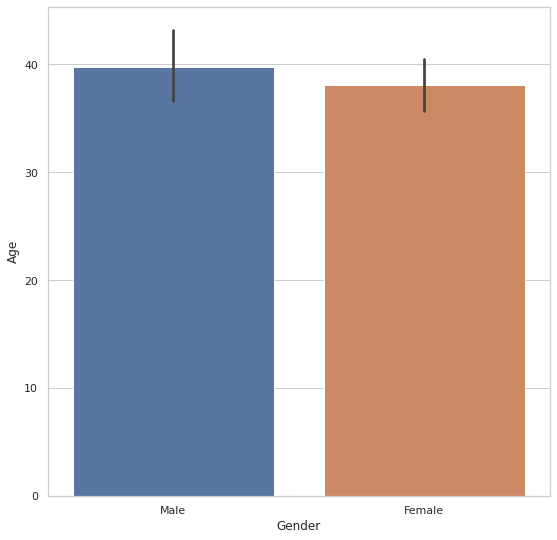

In [89]:
sns.barplot(x = data['Gender'], y = data['Age'])

<AxesSubplot:xlabel='Gender', ylabel='SpendingScore'>

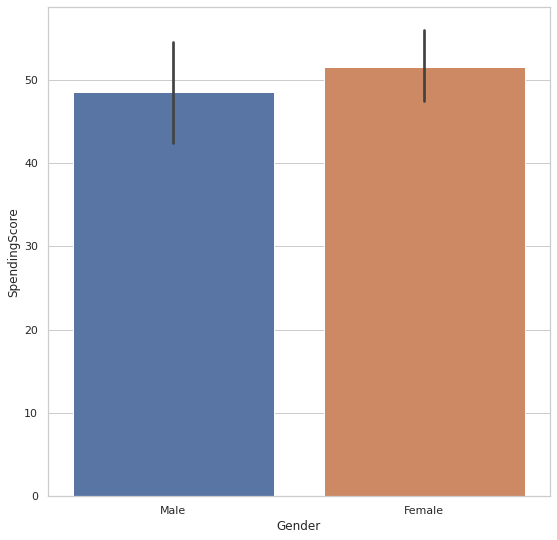

In [90]:
sns.barplot(x = data['Gender'], y = data['SpendingScore'])

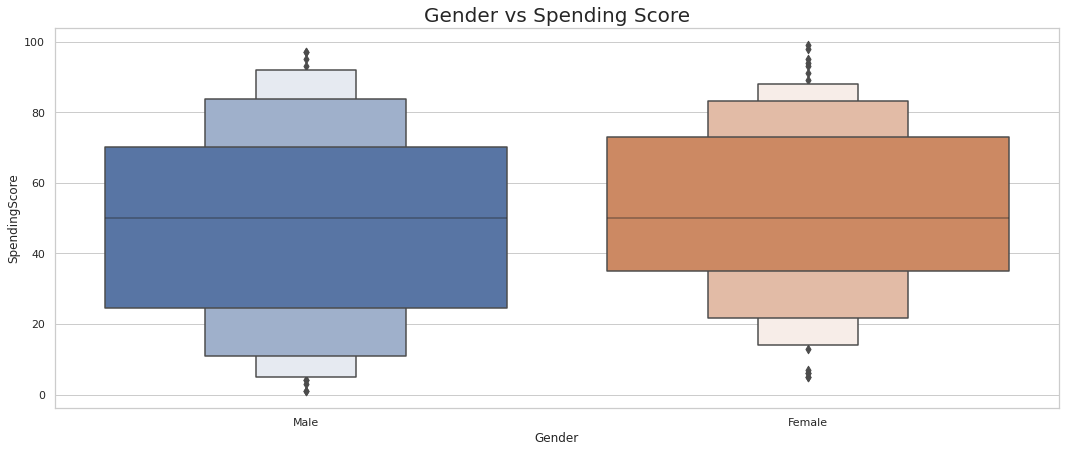

In [106]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['SpendingScore'])
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='AnnualIncome'>

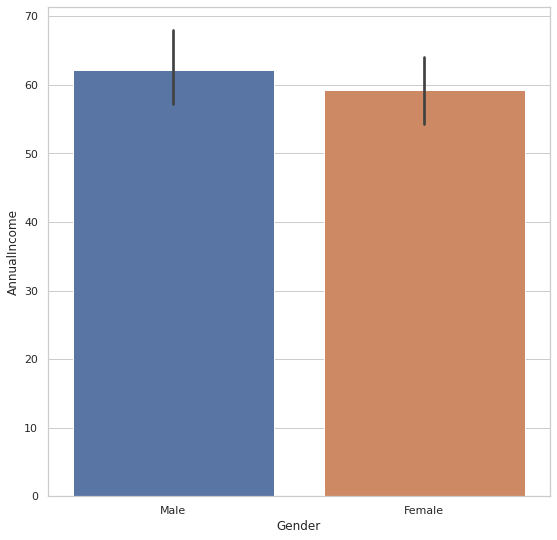

In [91]:
sns.barplot(x = data['Gender'], y = data['AnnualIncome'])

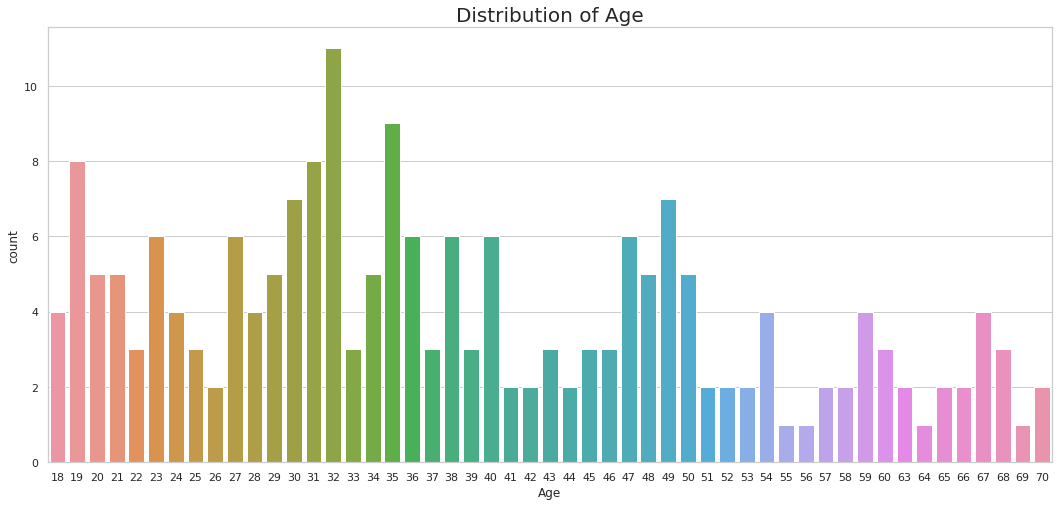

In [96]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

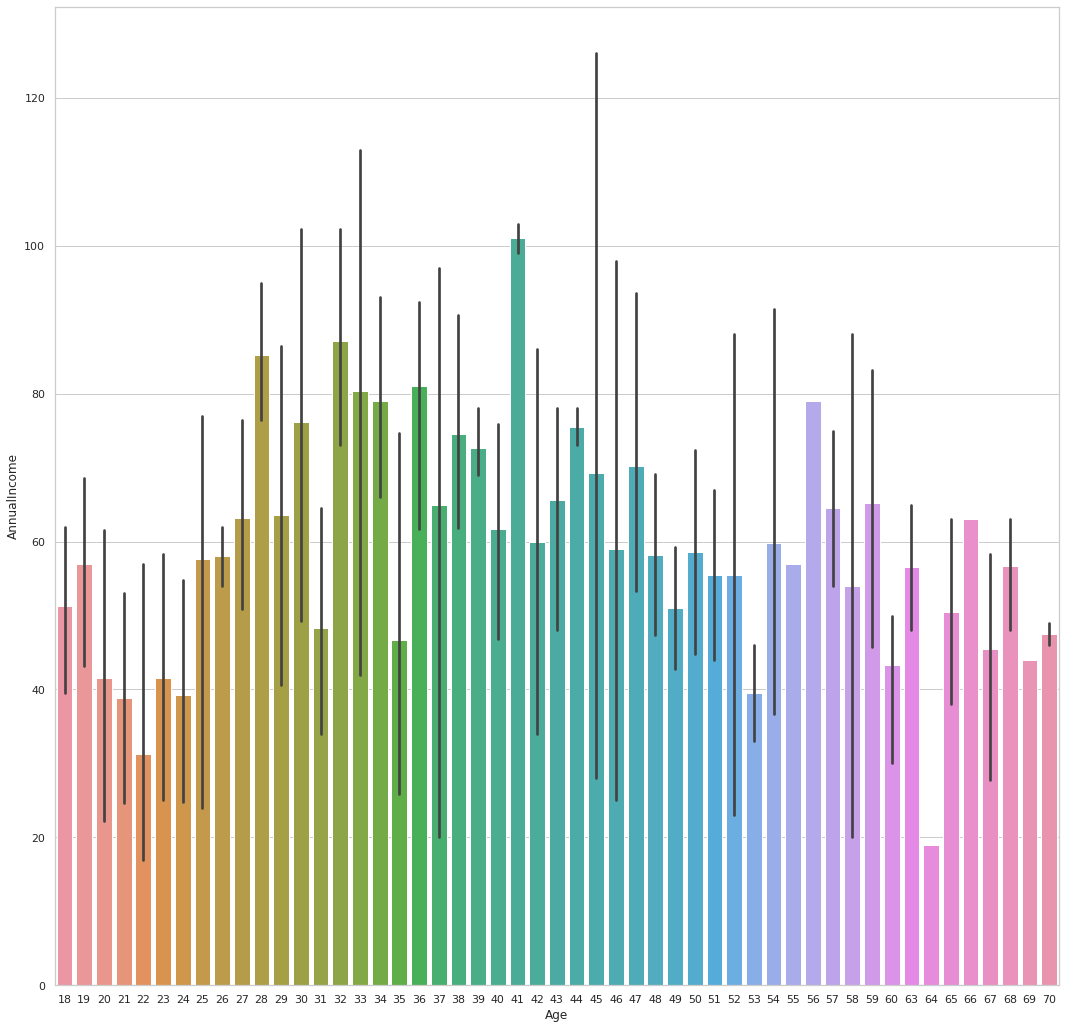

In [100]:
plt.rcParams['figure.figsize'] = (18, 18)

sns.barplot(x = data['Age'], y = data['AnnualIncome'])

<AxesSubplot:xlabel='Age', ylabel='SpendingScore'>

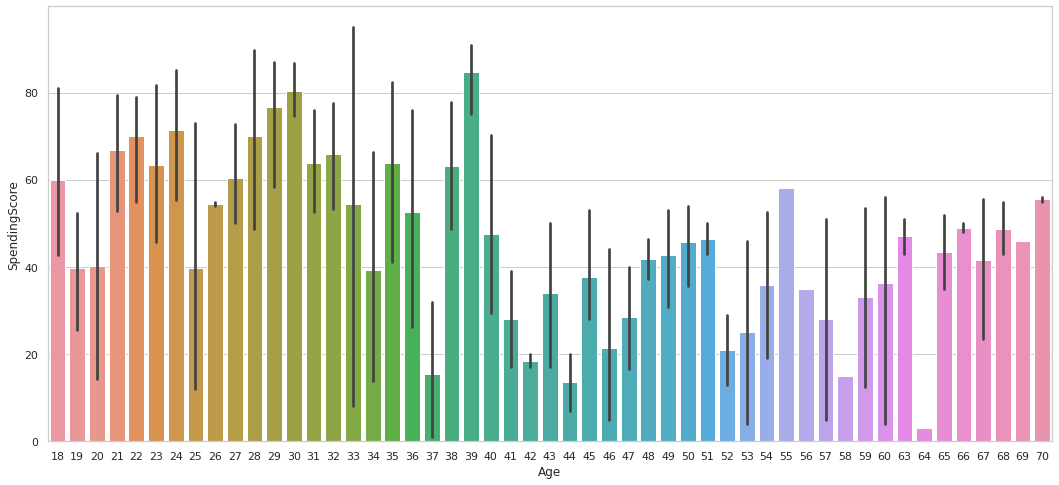

In [98]:
plt.rcParams['figure.figsize'] = (18, 8)

sns.barplot(x = data['Age'], y = data['SpendingScore'])

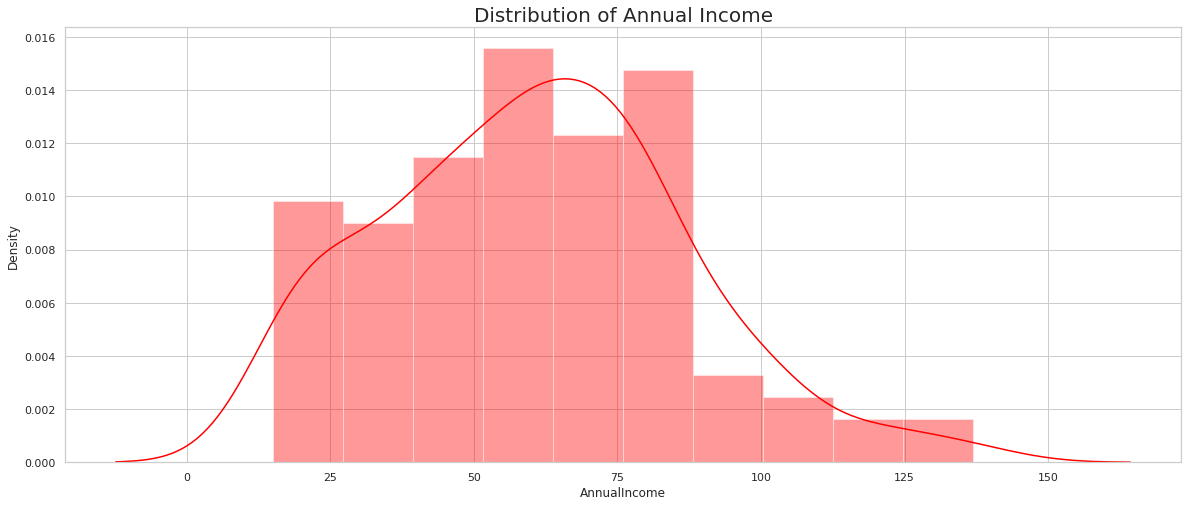

In [102]:
plt.rcParams['figure.figsize'] = (20, 8)

sns.distplot(data['AnnualIncome'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

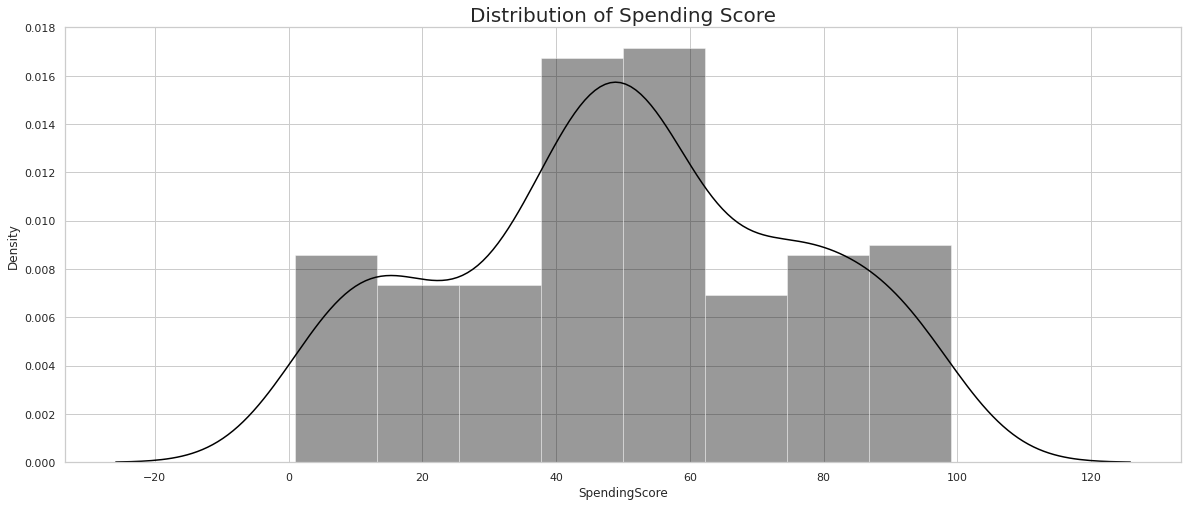

In [104]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['SpendingScore'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

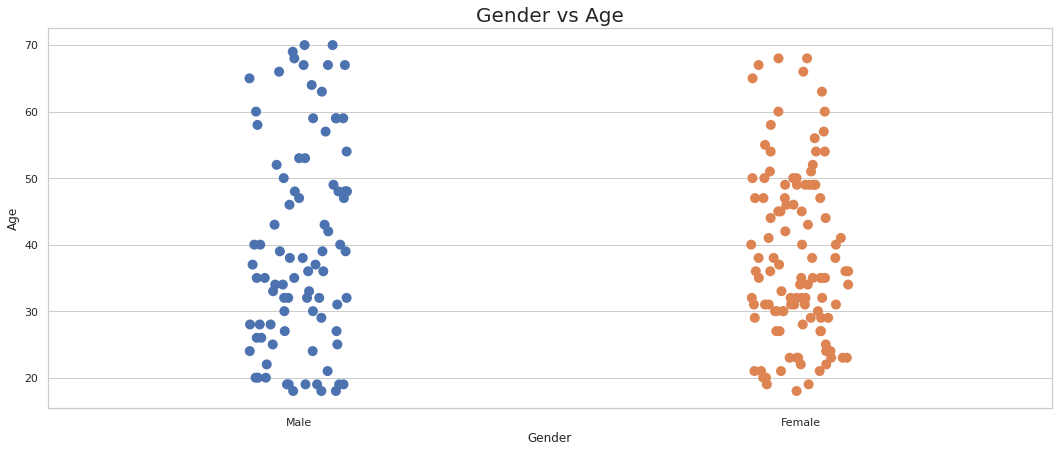

In [107]:
plt.rcParams['figure.figsize'] = (18, 7)

sns.stripplot(data['Gender'], data['Age'],  size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

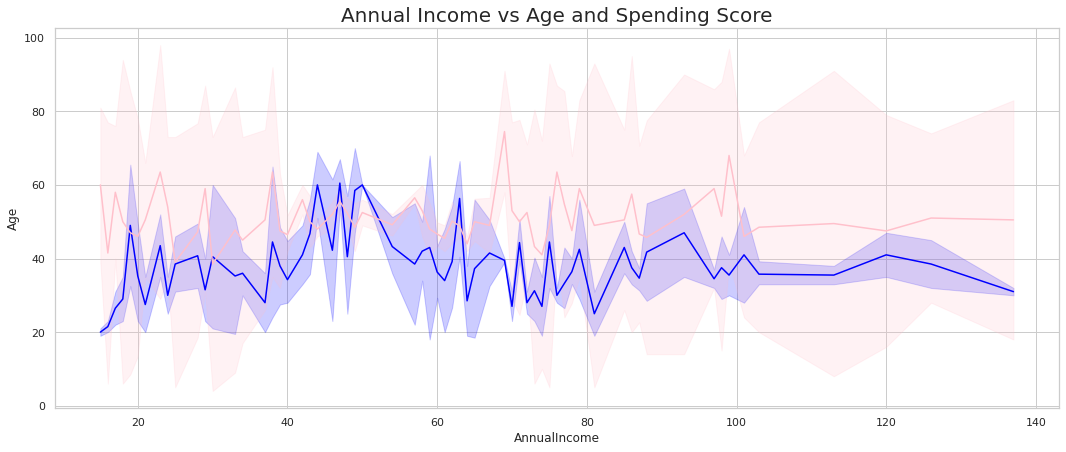

In [108]:
x = data['AnnualIncome']
y = data['Age']
z = data['SpendingScore']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [109]:
import warnings
warnings.filterwarnings('ignore')

x = data.loc[:, ['SpendingScore', 'AnnualIncome']].values

print(x.shape)

(200, 2)


In [110]:
x_data  = pd.DataFrame(x)
x_data.head()


,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


## Kmeans Algorithm

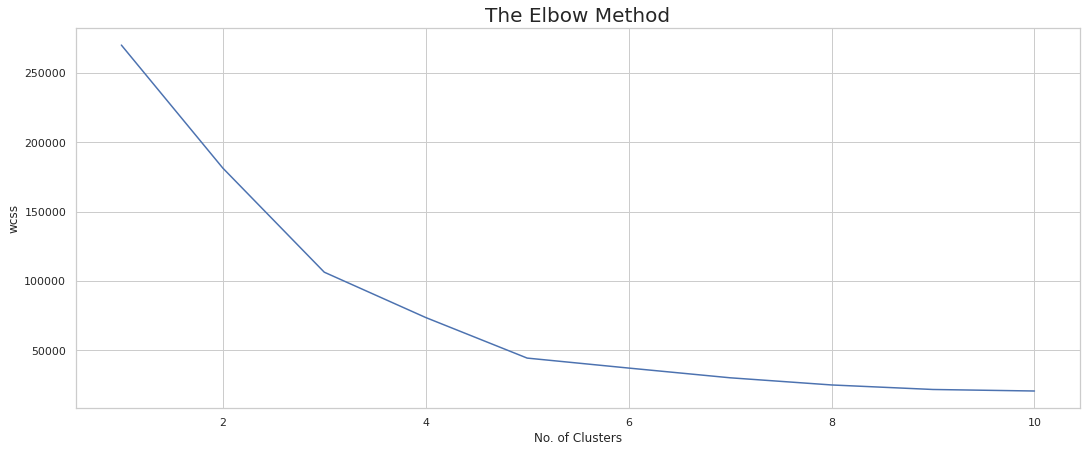

In [111]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

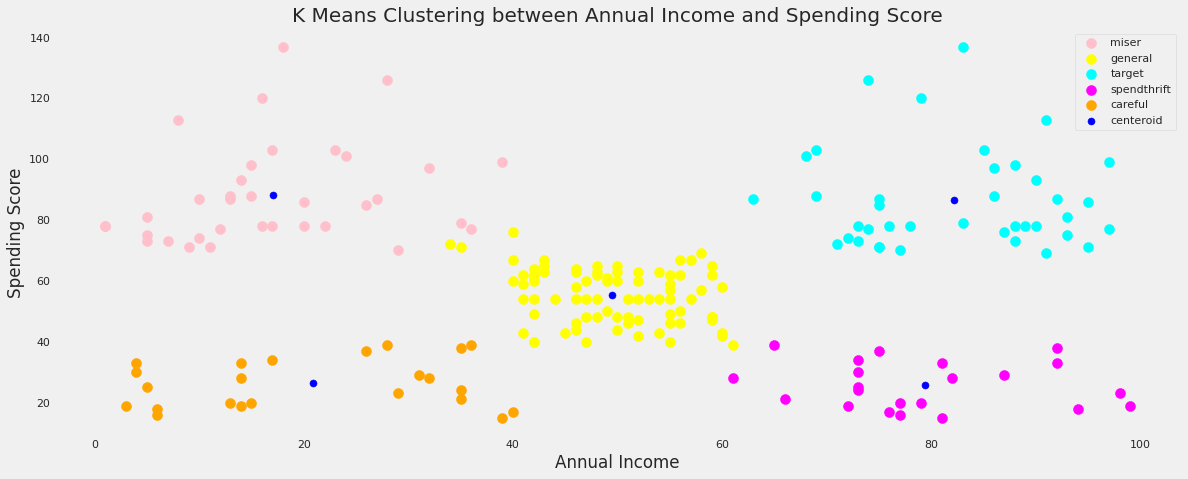

In [112]:
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

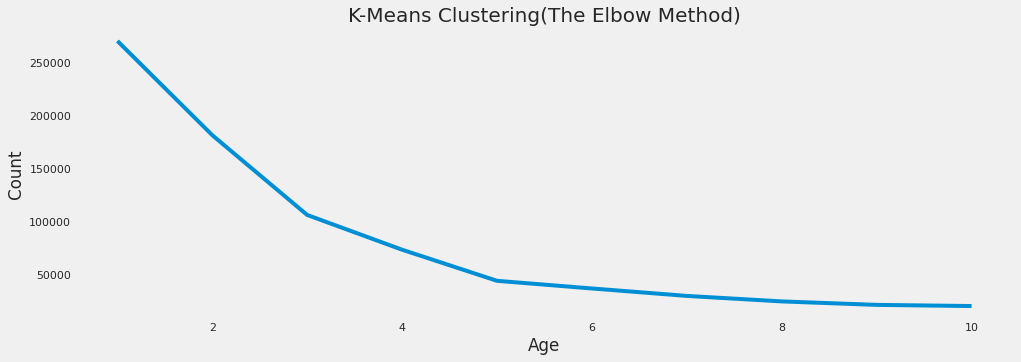

In [113]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

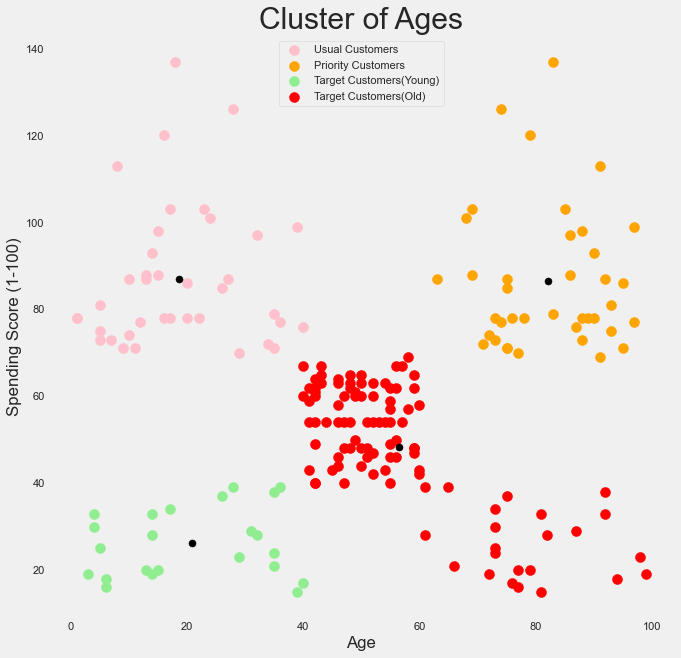

In [65]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()